<a href="https://colab.research.google.com/github/alifianmahardhika/finance/blob/main/IVC2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
list_tickers = ['GOOGL', 'AAPL', 'MSFT', 'AMZN', 'FB']
data = yf.download(
    tickers= list_tickers,
    period='ytd'
)

[*********************100%***********************]  5 of 5 completed


In [4]:
data

Adj Close                           ...    Volume                   
                  AAPL         AMZN          FB  ...        FB    GOOGL      MSFT
Date                                             ...                             
2021-01-04  128.804825  3186.629883  268.940002  ...  15106100  1866200  37130100
2021-01-05  130.397324  3218.510010  270.970001  ...   9871600  1018000  23823000
2021-01-06  126.007957  3138.379883  263.309998  ...  24354100  2329400  35930700
2021-01-07  130.307755  3162.159912  268.739990  ...  15789800  2096800  27694500
2021-01-08  131.432465  3182.699951  267.570007  ...  18528300  1774200  22956200
...                ...          ...         ...  ...       ...      ...       ...
2021-08-13  149.100006  3293.969971  363.179993  ...   7192500   797000  18231400
2021-08-16  151.119995  3298.989990  366.559998  ...  11222100  1119200  22507600
2021-08-17  150.190002  3241.959961  358.450012  ...  12328700  1085800  20075300
2021-08-18  146.360001  3201.219971  355.450012  ...  10034200   962900  21813000
2021-08-19  146.699997  3187.750000  354.819092  ...   9143135  1087600  29821100

[159 rows x 30 columns]

In [5]:
df = data['Adj Close']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159 entries, 2021-01-04 to 2021-08-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    159 non-null    float64
 1   AMZN    159 non-null    float64
 2   FB      159 non-null    float64
 3   GOOGL   159 non-null    float64
 4   MSFT    159 non-null    float64
dtypes: float64(5)
memory usage: 7.5 KB


In [7]:
df.isin([np.inf, -np.inf]).values.sum()

0

In [8]:
df.isna().values.sum()

0

In [9]:
maxdf = df.max()
maxdf

AAPL      151.119995
AMZN     3731.409912
FB        373.279999
GOOGL    2766.189941
MSFT      296.769989
dtype: float64

In [10]:
mindf = df.min()
mindf

AAPL      115.988907
AMZN     2951.949951
FB        245.639999
GOOGL    1722.880005
MSFT      210.870728
dtype: float64

In [11]:
max_min = maxdf.sub(mindf)
max_min

AAPL       35.131088
AMZN      779.459961
FB        127.639999
GOOGL    1043.309937
MSFT       85.899261
dtype: float64

In [12]:
df_new = df.sub(mindf, axis=1).div(max_min, axis=1)
df_new

,AAPL,AMZN,FB,GOOGL,MSFT
Date,,,,,
2021-01-04,0.364803,0.301080,0.182545,0.003115,0.062918
2021-01-05,0.410133,0.341980,0.198449,0.016457,0.065347
2021-01-06,0.285190,0.239178,0.138436,0.000000,0.000000
2021-01-07,0.407583,0.269687,0.180978,0.049324,0.069858
2021-01-08,0.439598,0.296038,0.171811,0.071839,0.085241
...,...,...,...,...,...
2021-08-13,0.942501,0.438791,0.920871,0.988843,0.947851
2021-08-16,1.000000,0.445231,0.947352,1.000000,0.968185
2021-08-17,0.973528,0.372065,0.883814,0.968408,0.950523


In [13]:
print(df_new.head(5))

                AAPL      AMZN        FB     GOOGL      MSFT
Date                                                        
2021-01-04  0.364803  0.301080  0.182545  0.003115  0.062918
2021-01-05  0.410133  0.341980  0.198449  0.016457  0.065347
2021-01-06  0.285190  0.239178  0.138436  0.000000  0.000000
2021-01-07  0.407583  0.269687  0.180978  0.049324  0.069858
2021-01-08  0.439598  0.296038  0.171811  0.071839  0.085241


In [14]:
print(df_new.columns.tolist())

['AAPL', 'AMZN', 'FB', 'GOOGL', 'MSFT']


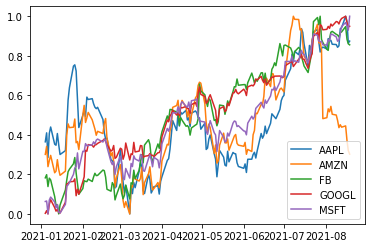

In [15]:
plt.plot(df_new)
plt.legend(df_new.columns.tolist())
plt.show()

In [16]:
corrMatrix = df_new.corr()

In [17]:
corrMatrix

,AAPL,AMZN,FB,GOOGL,MSFT
AAPL,1.000000,0.736836,0.625195,0.625853,0.777496
AMZN,0.736836,1.000000,0.676231,0.621876,0.715897
FB,0.625195,0.676231,1.000000,0.945216,0.911668
GOOGL,0.625853,0.621876,0.945216,1.000000,0.957994
MSFT,0.777496,0.715897,0.911668,0.957994,1.000000


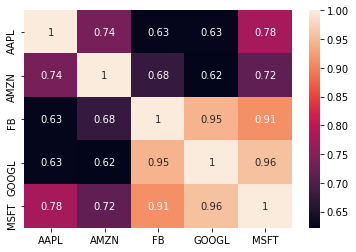

In [18]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [27]:
df_returns = df_new.pct_change()[20:]

In [28]:
df_returns.replace([np.inf, -np.inf], np.nan, inplace=True)

In [29]:
df_returns = df_returns.dropna()

In [30]:
df_returns.isin([np.inf, -np.inf]).values.sum()

0

In [31]:
df_returns.isna().values.sum()

0

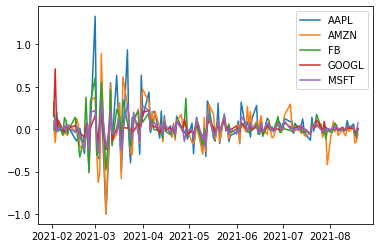

In [32]:
plt.plot(df_returns)
plt.legend(df_returns.columns.tolist())
plt.show()

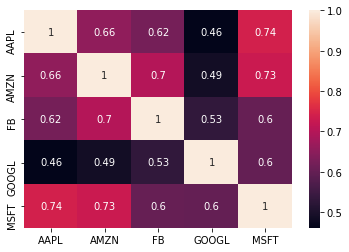

In [33]:
sn.heatmap(df_returns.corr(), annot=True)
plt.show()

In [34]:
w = [0.1,0.2,0.25,0.25,0.2]

In [35]:
print(sum(w))

1.0


In [36]:
weighted_returns = (w * df_returns)
print(weighted_returns.head(5))

                AAPL      AMZN        FB     GOOGL      MSFT
Date                                                        
2021-02-02  0.004828  0.018991  0.077428  0.038266 -0.001022
2021-02-03 -0.005689 -0.031524 -0.005014  0.178047  0.025605
2021-02-04  0.019821  0.010245 -0.001904 -0.003906 -0.006439
2021-02-05 -0.002041  0.011159  0.019305  0.026606  0.001277
2021-02-08  0.000735 -0.014598 -0.016919 -0.002944  0.001803


In [37]:
port_ret = weighted_returns.sum(axis=1)
# axis =1 tells pandas we want to add the rows
print(port_ret)

Date
2021-02-02    0.138491
2021-02-03    0.161425
2021-02-04    0.017816
2021-02-05    0.056307
2021-02-08   -0.031923
                ...   
2021-08-13    0.006703
2021-08-16    0.023336
2021-08-17   -0.063827
2021-08-18   -0.056327
2021-08-19    0.005173
Length: 138, dtype: float64


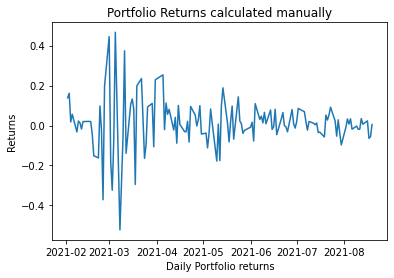

In [40]:
plt.plot(port_ret)
plt.xlabel('Daily Portfolio returns')
plt.ylabel("Returns")
plt.title("Portfolio Returns calculated manually")
plt.show()

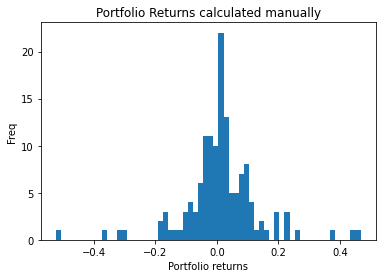

In [39]:
plt.hist(port_ret, bins = 60)
plt.xlabel('Portfolio returns')
plt.ylabel("Freq")
plt.title("Portfolio Returns calculated manually")
plt.show()